<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: José Enrique Alvardo Espinoza</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

Text(0, 0.5, 'AbsorbanceTE')

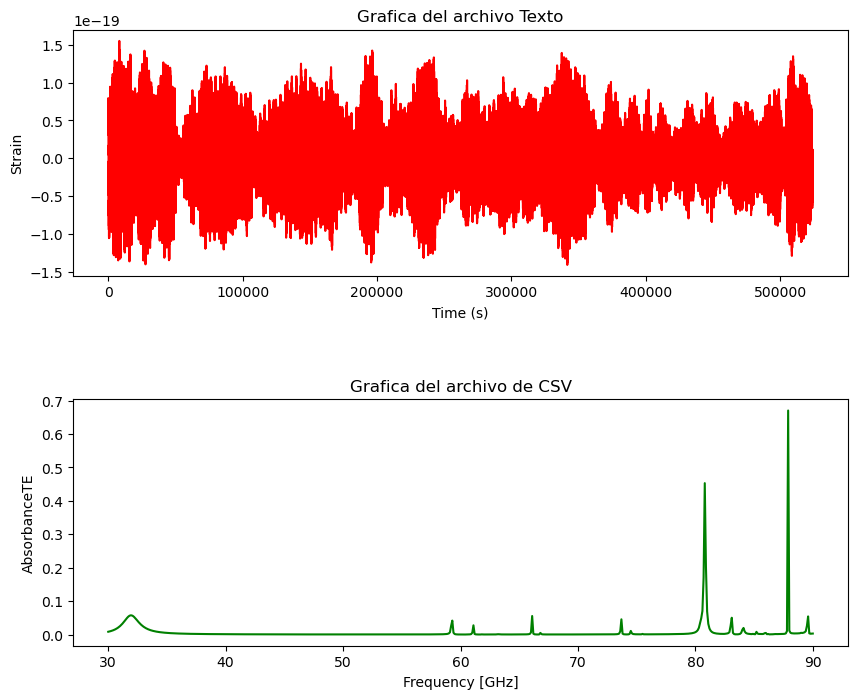

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import signal
from PIL import Image
from io import BytesIO
import urllib.request
from urllib.request import urlopen


"""
 Actividad 1
 
 Utilizaremos panda para cargar los datos que cargamos en nuestro respositorio git previamente 
 Utilizaremos los links RAW estos se pueden obtener a un lado de las descargas del github para que nuestro
 codigo sea capaz de observar solo los datos
"""
url_csv = "https://raw.githubusercontent.com/kationj/EIE-401JEAE_Actividades/main/Actividad_2/DatosacargarTE0_0.csv"
url_txt = "https://raw.githubusercontent.com/kationj/EIE-401JEAE_Actividades/main/Actividad_2/datosacargartexto.txt"

# Carga de datos

datos_csv = pd.read_csv(url_csv)
datos_txt = np.genfromtxt(urlopen(url_txt), skip_header = 3)

fig, ax = plt.subplots(2, 1, figsize = (10, 8))

plt.subplots_adjust(hspace = 0.5 ) 
# Grafica del archivo .txt
ax[0].plot(datos_txt , color = "red")
ax[0].set_title("Grafica del archivo Texto")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Strain")

# Grafica del archivo .csv
ax[1].plot(datos_csv["Freq [GHz]"], datos_csv["AbsorbanceTE []"], color = "green")
ax[1].set_title("Grafica del archivo de CSV")
ax[1].set_xlabel("Frequency [GHz]")
ax[1].set_ylabel("AbsorbanceTE")


## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


$$Cos1 = \cos^2(2 \cdot \pi \cdot f \cdot t)$$
$$Cos2 = \cos^2(2\pi f t + \frac{3\cdot\pi}{4}) $$
$$ f1 = Cos1 + Cos2  $$

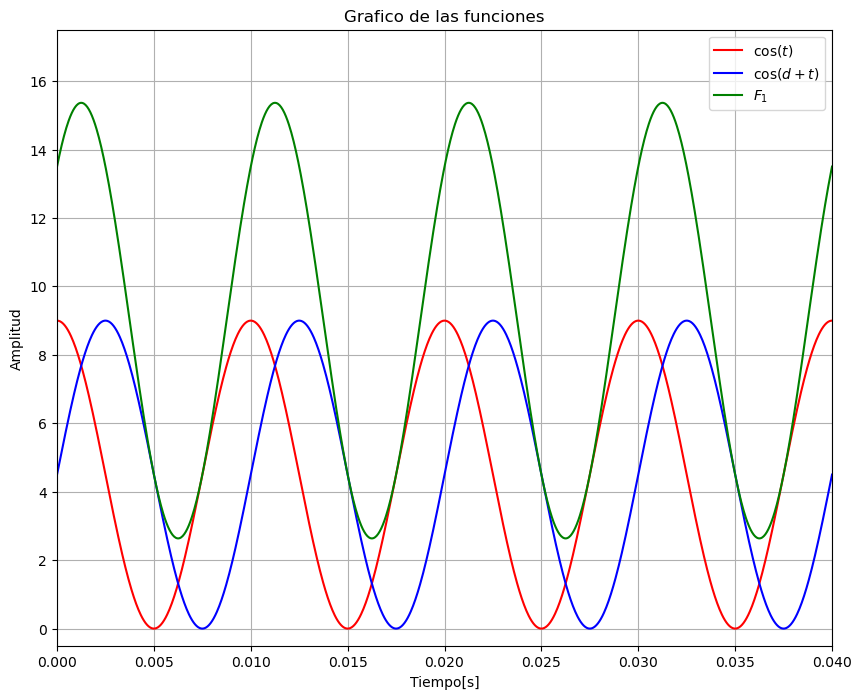

In [38]:
"""
Actividad 2
Sumaremos dos señales continuas para este caso utilizaremos dos cosenoidales desplazadas

"""

d = (3*np.pi/4) #dezplazamiento
frecue_act2 = 50   #frecuencia de las señales
t = np.linspace(0, 0.04, 1000)
cos_1 = 3*np.cos(2* np.pi * frecue_act2 * t) * 3*np.cos(2* np.pi * frecue_act2 * t)
cos_2 = 3*np.cos(d + 2* np.pi * frecue_act2 * t) * 3*np.cos(d + 2* np.pi * frecue_act2 * t)
F_1 = cos_1 + cos_2



# Crea una matriz de subgráficos (2 filas, 2 columnas)
fig, ax = plt.subplots(figsize=(10, 8))

# Grafica las funciones en el mismo gráfico
ax.plot(t, cos_1, label = r"$\cos(t)$", color = "red")
ax.plot(t, cos_2, label = r"$\cos(d + t)$", color = "blue")
ax.plot(t, F_1, label = r"$F_1 $", color = "green")

# Ajusta los límites de los ejes
ax.set_xlim(0, 0.04)

ax.set_ylim(-0.5, 17.5)

# Agrega leyenda en la esquina superior derecha
ax.legend(loc = "upper right", fontsize = "medium")

# Etiquetas y título
ax.set_xlabel("Tiempo[s]")
ax.set_ylabel("Amplitud")
ax.set_title("Grafico de las funciones")

plt.grid()
plt.show()

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

ingrese un numero para graficar el impulso: 3


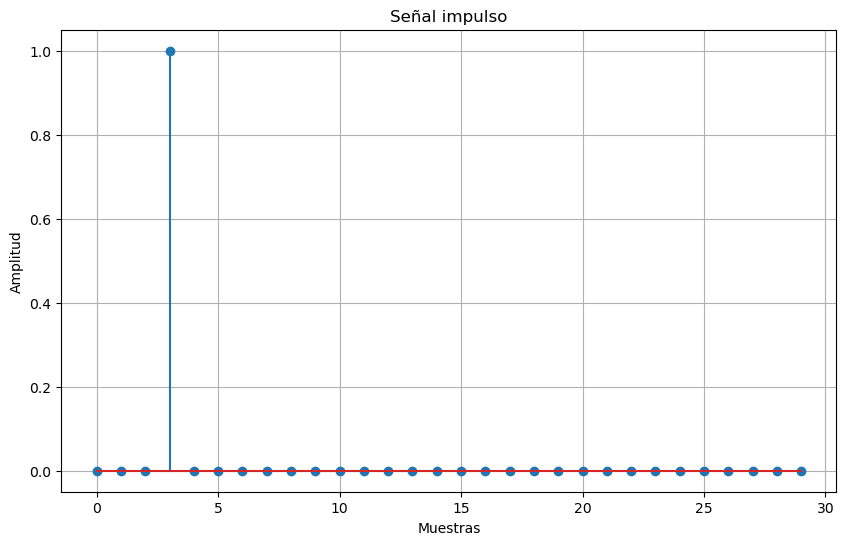

Ingrese el numero de veces que desea desplazar el impulso: 15


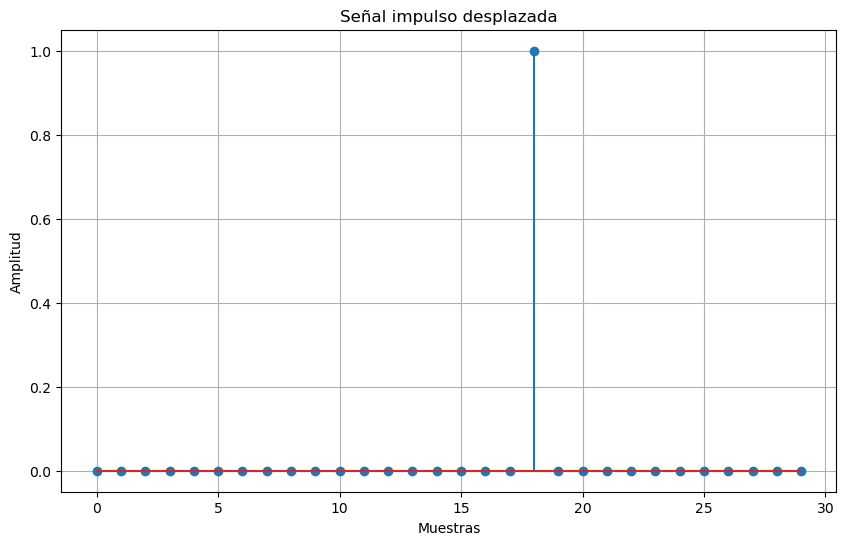

In [39]:
"""
Actividad 3

3.1) Crear una señal impulso y desplazarla

"""

lar = 30 # largo que utilizaremos para la grafica
imp = int(input("ingrese un numero para graficar el impulso: "))

impulso_1 = np.zeros(lar) # creamos un arreglo de 0 
impulso_1[imp] = 1 # y a la entrada imp le asignaremos el valor de 1 que sera el impulso que graficaremos

#Graficamos la señal

plt.figure(figsize = (10, 6))
plt.stem(range(lar), impulso_1)
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.title("Señal impulso")
plt.grid()
plt.show()

desplazar = int(input("Ingrese el numero de veces que desea desplazar el impulso: "))
imp2 = imp + desplazar

impulso_2 = np.zeros(lar)  
impulso_2[imp2] = 1

#Graficamos la señal

plt.figure(figsize = (10, 6))
plt.stem(range(lar), impulso_2)
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.title("Señal impulso desplazada")
plt.grid()
plt.show()

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

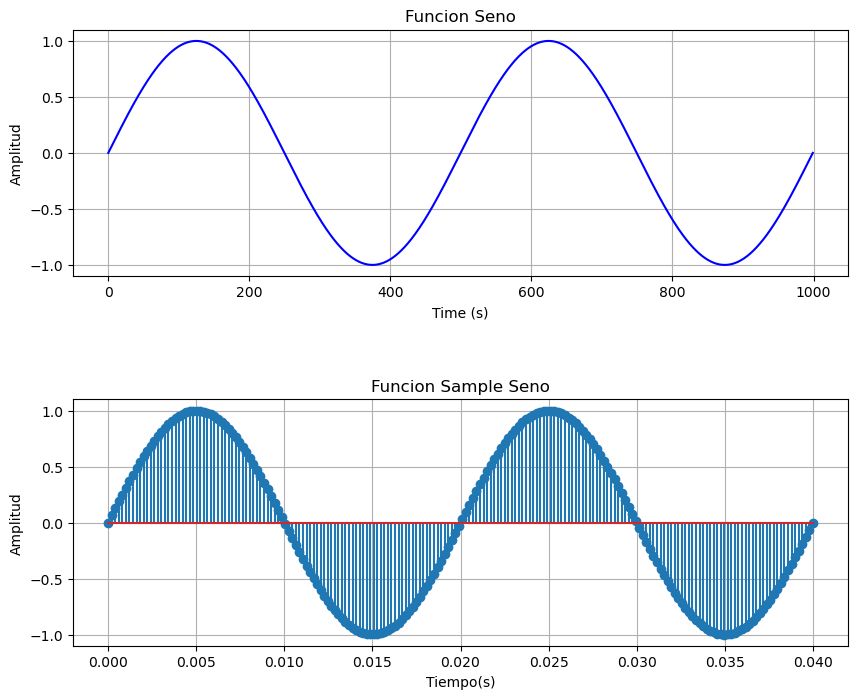

In [40]:
"""
3.2 Genere una señal senoidal y realice sampleo

estableceremos la frecuencia de la señal en 50 que es quivalente a t = 0,02
por lo tanto deberiamos hacer 100 muestras por ciclo
"""

t_1 = np.linspace(0, 0.04, 1000)
t_2 = np.linspace(0, 0.04, 200) # sacaremos 100 muestras por ciclo

frecuencia_1 = 50 # Frecuencia asignada para nuestra señal

amplitud = 1

sen_sam_1 = amplitud * np.sin(2* np.pi * frecuencia_1 * t_1) 
sen_sam_2 = amplitud * np.sin(2* np.pi * frecuencia_1 * t_2) 
fig, ax = plt.subplots(2, 1, figsize = (10, 8))


plt.subplots_adjust(hspace = 0.5 ) 
# Grafica del seno 
ax[0].plot(sen_sam_1 , color = "Blue")
ax[0].set_title("Funcion Seno")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitud")
ax[0].grid()


# Grafica del sample
ax[1].stem(t_2, sen_sam_2)
ax[1].set_title("Funcion Sample Seno")
ax[1].set_xlabel("Tiempo(s)")
ax[1].set_ylabel("Amplitud")
ax[1].grid()

plt.show()

### 3.3 Genere una señal Triangular y realice la operación de sampleo

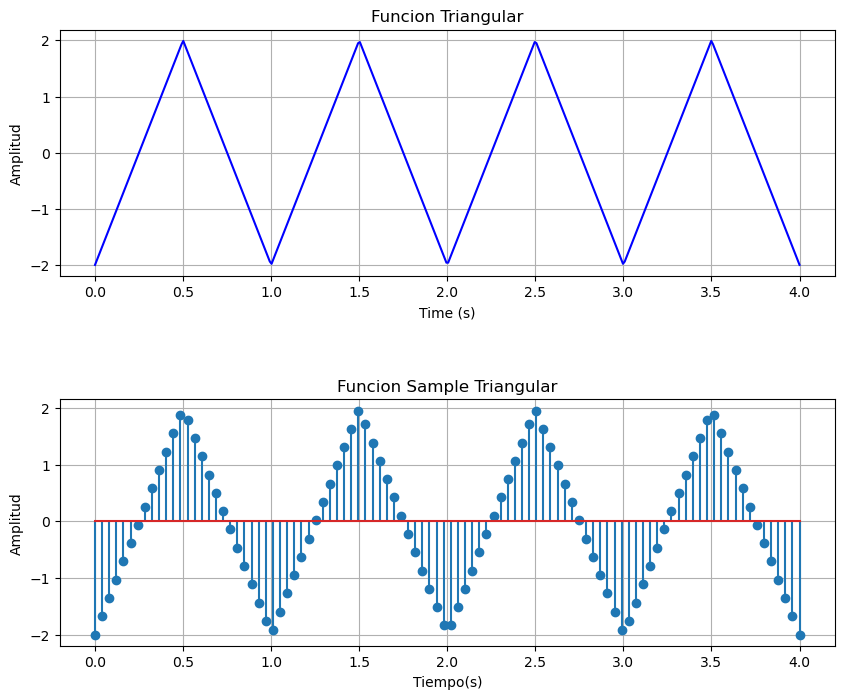

In [41]:
"""
3.3) Señal triangular y Sampleo

"""
t_triangular = np.linspace(0, 4, 400) # 4 ciclos
t_triangular_sampleo = np.linspace(0, 4, 100) 

Triangular_1 = 2*signal.sawtooth(2 * np.pi * 1 * t_triangular, 0.5 )
Triangular_sam = 2*signal.sawtooth(2 * np.pi * 1 * t_triangular_sampleo, 0.5 )

#Grafica
fig, ax = plt.subplots(2, 1, figsize = (10, 8))

plt.subplots_adjust(hspace = 0.5 ) 
# Grafica del seno 
ax[0].plot(t_triangular, Triangular_1, color = "Blue")
ax[0].set_title("Funcion Triangular")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitud")
ax[0].grid()


# Grafica del sample
ax[1].stem(t_triangular_sampleo, Triangular_sam)
ax[1].set_title("Funcion Sample Triangular")
ax[1].set_xlabel("Tiempo(s)")
ax[1].set_ylabel("Amplitud")
ax[1].grid()

plt.show()

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

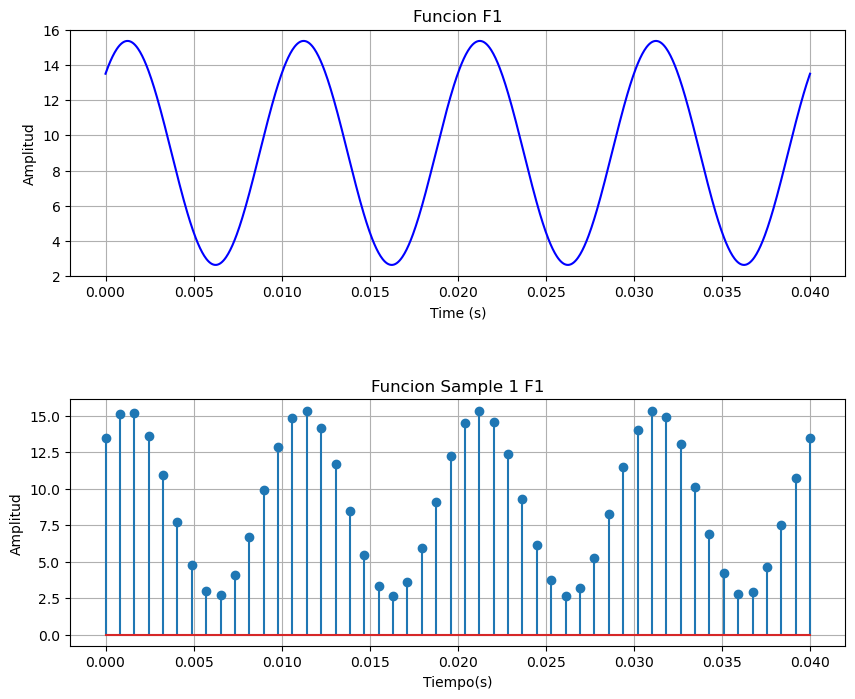

In [42]:
"""
3.4) sampleo con la señal de la actividad 2
que es F_1 :


d = (3*np.pi/4) #dezplazamiento
frecue_act2 = 50   #frecuencia de las señales
t = np.linspace(0, 0.04, 1000)
cos_1 = 3*np.cos(2* np.pi * frecue_act2 * t) * 3*np.cos(2* np.pi * frecue_act2 * t)
cos_2 = 3*np.cos(d + 2* np.pi * frecue_act2 * t) * 3*np.cos(d + 2* np.pi * frecue_act2 * t)
F_1 = cos_1 + cos_2

"""

t_sam_1 = np.linspace(0, 0.04, 50)


cos_1_sam1 = 3*np.cos(2* np.pi * frecue_act2 * t_sam_1) * 3*np.cos(2* np.pi * frecue_act2 * t_sam_1)
cos_2_sam1 = 3*np.cos(d + 2* np.pi * frecue_act2 * t_sam_1) * 3*np.cos(d + 2* np.pi * frecue_act2 * t_sam_1)



F_1_sam1 = cos_1_sam1 + cos_2_sam1

#Grafica
fig, ax = plt.subplots(2, 1, figsize = (10, 8))

plt.subplots_adjust(hspace = 0.5 ) 
# Grafica de F1
ax[0].plot(t, F_1, color = "Blue")
ax[0].set_title("Funcion F1")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitud")
ax[0].grid()

# Grafica del sample 1
ax[1].stem(t_sam_1, F_1_sam1)
ax[1].set_title("Funcion Sample 1 F1")
ax[1].set_xlabel("Tiempo(s)")
ax[1].set_ylabel("Amplitud")
ax[1].grid()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

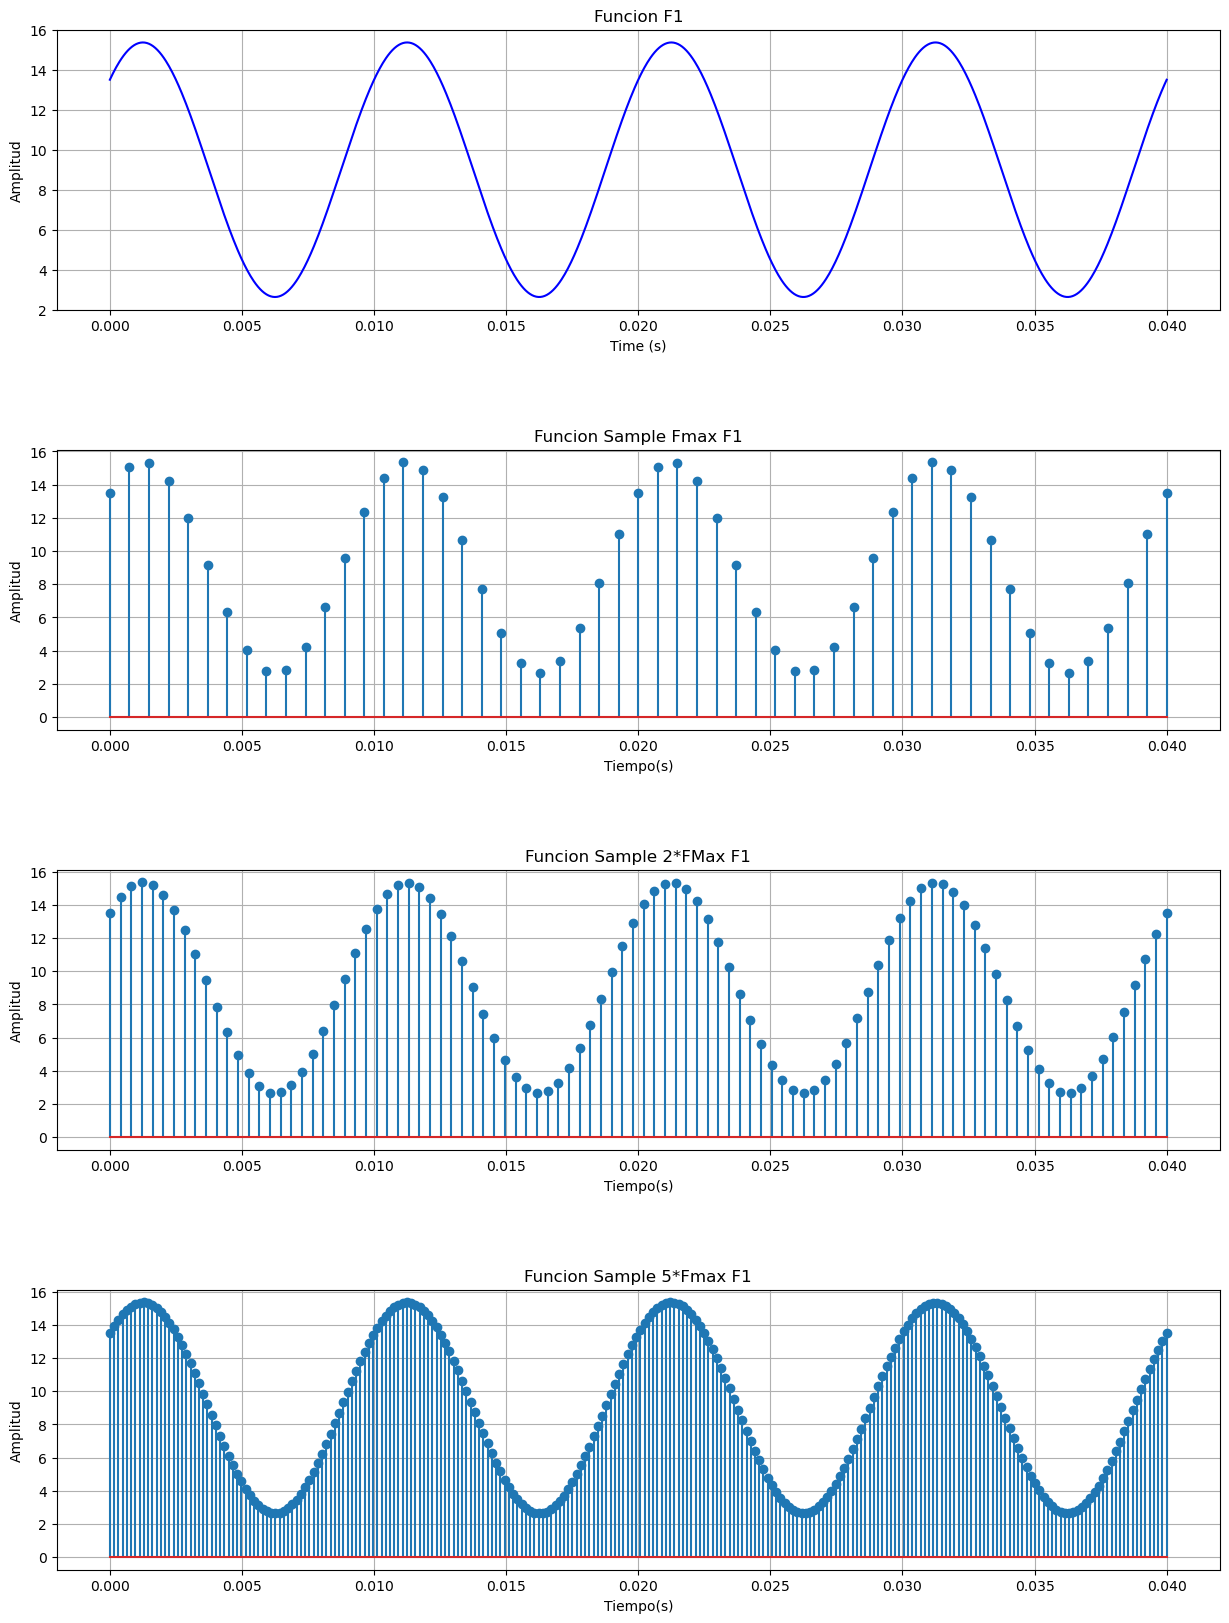

In [43]:
"""
3.5) utilizaremos diferentes frecuencias para muestrear la señal y luego las compararemos con la originizal como
como no se especifica para este caso utilizaremos la misma funcion del punto anterior

d = (3*np.pi/4)  #desplazamiento
frecue_act2 = 50   #frecuencia de las señales
t = np.linspace(0, 0.04, 1000)
cos_1 = 3*np.cos(2* np.pi * frecue_act2 * t) * 3*np.cos(2* np.pi * frecue_act2 * t)
cos_2 = 3*np.cos(d + 2* np.pi * frecue_act2 * t) * 3*np.cos(d + 2* np.pi * frecue_act2 * t)
F_1 = cos_1 + cos_2

"""

t_sam_2 = np.linspace(0, 0.04, 55)  #Frecuencia Max
t_sam_3 = np.linspace(0, 0.04, 100)  #Frecuencia doble
t_sam_4 = np.linspace(0, 0.04, 250)  #Frecuencia 5

#Frecuencia Max
cos_1_sam2 = 3*np.cos(2* np.pi * frecue_act2 * t_sam_2) * 3*np.cos(2* np.pi * frecue_act2 * t_sam_2)
cos_2_sam2 = 3*np.cos(d + 2* np.pi * frecue_act2 * t_sam_2) * 3*np.cos(d + 2* np.pi * frecue_act2 * t_sam_2)

#Frecuencia Doble
cos_1_sam3 = 3*np.cos(2* np.pi * frecue_act2 * t_sam_3) * 3*np.cos(2* np.pi * frecue_act2 * t_sam_3)
cos_2_sam3 = 3*np.cos(d + 2* np.pi * frecue_act2 * t_sam_3) * 3*np.cos(d + 2* np.pi * frecue_act2 * t_sam_3)

#Frecuencia 5
cos_1_sam4 = 3*np.cos(2* np.pi * frecue_act2 * t_sam_4) * 3*np.cos(2* np.pi * frecue_act2 * t_sam_4)
cos_2_sam4 = 3*np.cos(d + 2* np.pi * frecue_act2 * t_sam_4) * 3*np.cos(d + 2* np.pi * frecue_act2 * t_sam_4)


F_1_sam2 = cos_1_sam2 + cos_2_sam2 #Frecuencia Max
F_1_sam3 = cos_1_sam3 + cos_2_sam3 #Frecuencia 2
F_1_sam4 = cos_1_sam4 + cos_2_sam4 #Frecuencia 5


#Grafica
fig, ax = plt.subplots(4, 1, figsize = (15, 20))

plt.subplots_adjust(hspace = 0.5 ) 
# Grafica de F1
ax[0].plot(t, F_1, color = "Blue")
ax[0].set_title("Funcion F1")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitud")
ax[0].grid()


# Grafica del sample 1
ax[1].stem(t_sam_2, F_1_sam2)
ax[1].set_title("Funcion Sample Fmax F1")
ax[1].set_xlabel("Tiempo(s)")
ax[1].set_ylabel("Amplitud")
ax[1].grid()

# Grafica del sample 2
ax[2].stem(t_sam_3, F_1_sam3)
ax[2].set_title("Funcion Sample 2*FMax F1")
ax[2].set_xlabel("Tiempo(s)")
ax[2].set_ylabel("Amplitud")
ax[2].grid()

# Grafica del sample 3
ax[3].stem(t_sam_4, F_1_sam4)
ax[3].set_title("Funcion Sample 5*Fmax F1")
ax[3].set_xlabel("Tiempo(s)")
ax[3].set_ylabel("Amplitud")
ax[3].grid()


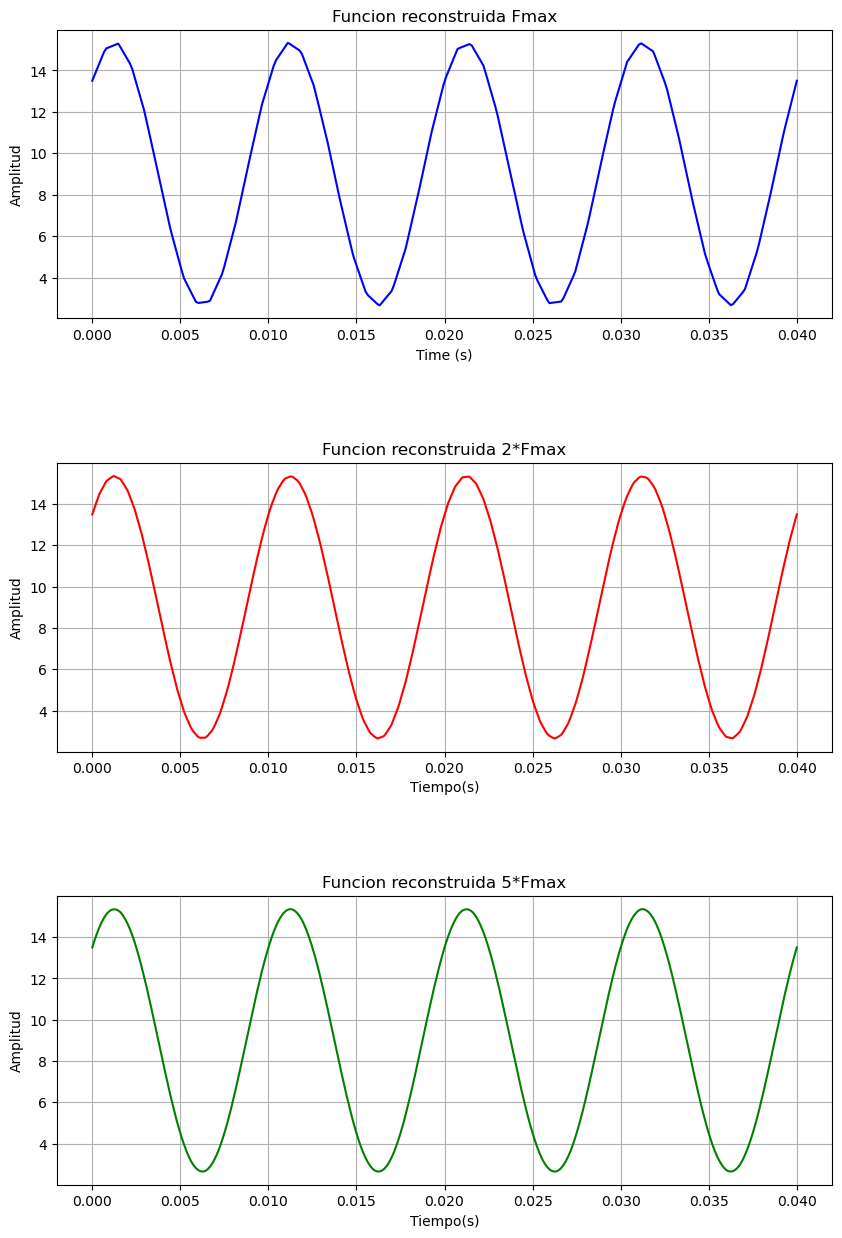

In [44]:
"""
Reconstrucción con interpolación

"""

# Interpolación lineal para reconstruir las señales continuas
t_recon = np.linspace(0, 0.04, 300)  # Nuevos puntos de tiempo
interp_func_sam2 = np.interp(t_recon, t_sam_2, F_1_sam2)
interp_func_sam3 = np.interp(t_recon, t_sam_3, F_1_sam3)
interp_func_sam4 = np.interp(t_recon, t_sam_4, F_1_sam4)

#Grafica de señales reconstruidas
fig, ax = plt.subplots(3, 1, figsize = (10, 15))

plt.subplots_adjust(hspace = 0.5 ) 
# Grafica de Sample 1

ax[0].plot(t_recon, interp_func_sam2, color = "Blue")
ax[0].set_title("Funcion reconstruida Fmax")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitud")
ax[0].grid()


# Grafica del sample 1
ax[1].plot(t_recon, interp_func_sam3, color = "Red")
ax[1].set_title("Funcion reconstruida 2*Fmax")
ax[1].set_xlabel("Tiempo(s)")
ax[1].set_ylabel("Amplitud")
ax[1].grid()

# Grafica del sample 2
ax[2].plot(t_recon, interp_func_sam4, color = "green")
ax[2].set_title("Funcion reconstruida 5*Fmax")
ax[2].set_xlabel("Tiempo(s)")
ax[2].set_ylabel("Amplitud")
ax[2].grid()



### 3.6 Explica tus hallazgos

Durante la sección uno de la actividad, se exploraron diversas formas de adquirir datos. Inicialmente, se optó por la idea de solicitar una descarga con la URL directa de los archivos ya cargados en GitHub. Luego, a través de un enrutamiento estándar a la carpeta de descarga común, se trabajó con los datos. Sin embargo, dado que cada usuario podría tener diferentes rutas para sus descargas, finalmente se decidió trabajar directamente con los datos en línea utilizando la dirección RAW de estos archivos. Es importante trabajar con los enlaces RAW, ya que de lo contrario, el código no será capaz de encontrar los datos de la forma correcta.

En la sección dos de la actividad, se realizó una breve investigación sobre cómo escribir ecuaciones en LaTeX. Además, se intentó mostrar una imagen a través de Git cargando una y utilizando la URL del RAW. Sin embargo, no se logró hacerlo completamente sin la necesidad de descargar la imagen. Por lo tanto, al igual que en la actividad uno, se descartó esta opción con la finalidad de que el usuario tenga la menor posibilidad de errores posibles. Se utilizaron dos cosenos cuadrados, uno normal y el otro desplazado, para finalmente sumarlos y graficarlos.

En la sección de Sampleo, se diseñó una función de impulso que posteriormente se desplazó a través de un arreglo de ceros. Además, se incorporaron un par de entradas interactivas para que el usuario pueda ajustar los parámetros según su comodidad y explorar la versatilidad del notebook. Se generó una señal senoidal y se muestreó utilizando plt.stem. Esta técnica resultó muy útil, ya que stem crea impulsos en los lugares donde se desean marcar las muestras, mejorando la visualización en comparación con la simple representación de puntos en el plano cartesiano. También se investigó el uso de diferentes bibliotecas para generar una señal triangular. Aunque consideramos utilizar sinewave, que permite generar señales con especificaciones personalizadas, no logramos imprimir las señales en pantalla. Finalmente, en el muestreo de la señal de la actividad 2, se decidio interpolar las muestras para comprobar el teorema de Nyquist. La interpolación consiste en construir una señal continua a partir de un conjunto discreto de puntos de datos.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[Funcion seno] https://pypi.org/project/pysinewave/